# Twitter Sentiment Analysis

In [1]:
from Modules.tweepy_streaming import saveTweepyTweets
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from wordcloud import WordCloud, STOPWORDS
from imageio import imread

import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import config
import warnings

warnings.filterwarnings("ignore")

## Stream Listening

In [2]:
tweepy_listener = saveTweepyTweets(time_limit=180, 
                                   num_of_tweets=50, 
                                   save_file='twitter_stream_data.json', 
                                   retweets=False)
auth = OAuthHandler(config.CONSUMER_KEY, config.CONSUMER_SECRET)
auth.set_access_token(config.ACCESS_TOKEN, config.ACCESS_TOKEN_SECRET)
stream = Stream(auth=auth, listener=tweepy_listener)

In [3]:
stream.filter(track=['anime'], languages=['en'], async=True)

Getting tweet #1...
Getting tweet #2...
Getting tweet #3...
Getting tweet #4...
Getting tweet #5...
Getting tweet #6...
Getting tweet #7...
Getting tweet #8...
Getting tweet #9...
Getting tweet #10...
Getting tweet #11...
Getting tweet #12...
Getting tweet #13...
Getting tweet #14...
Getting tweet #15...
Getting tweet #16...
Getting tweet #17...
Getting tweet #18...
Getting tweet #19...
Getting tweet #20...
Getting tweet #21...
Getting tweet #22...
Getting tweet #23...
Getting tweet #24...
Getting tweet #25...
Getting tweet #26...
Getting tweet #27...
Getting tweet #28...
Getting tweet #29...
Getting tweet #30...
Getting tweet #31...
Getting tweet #32...
Getting tweet #33...
Getting tweet #34...
Getting tweet #35...
Getting tweet #36...
Getting tweet #37...
Getting tweet #38...
Getting tweet #39...
Getting tweet #40...
Getting tweet #41...
Getting tweet #42...
Getting tweet #43...
Getting tweet #44...
Getting tweet #45...
Getting tweet #46...
Getting tweet #47...
Getting tweet #48...
G

## Preprocessing tweets

First let's define some helper functions.

In [21]:
def tweetsToDataFrame(json_file):
    data = []
    with open(json_file, 'r') as json_data:
        for line in json_data:
            tweet = json.loads(line) # load it as Python dict
            data.append(tweet)
    return pd.DataFrame(data)

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [22]:
tweet_df = tweetsToDataFrame('twitter_stream_data.json')
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,None,None,Mon Jun 18 20:22:59 +0000 2018,NaN,"{'symbols': [], 'user_mentions': [], 'urls': [...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...","Yeah I watch anime ,so what??",1529353379155,False,"{'profile_link_color': '19CF86', 'profile_back..."
1,None,None,Mon Jun 18 20:23:06 +0000 2018,NaN,"{'symbols': [], 'user_mentions': [], 'urls': [...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",Funko SDCC Exclusive Wave 1: Anime! Dragonball...,1529353386957,False,"{'profile_link_color': '0084B4', 'profile_back..."
2,None,None,Mon Jun 18 20:23:06 +0000 2018,NaN,"{'symbols': [], 'user_mentions': [], 'urls': [...",NaN,{'full_text': 'They show it to everyone and ev...,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/android"" ...",They show it to everyone and even the pictures...,1529353386996,True,"{'profile_link_color': '1DA1F2', 'profile_back..."
3,None,None,Mon Jun 18 20:23:11 +0000 2018,NaN,"{'symbols': [], 'user_mentions': [{'id_str': '...",NaN,{'full_text': '@Hxrvi probs one of the only me...,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@Hxrvi probs one of the only members i like fr...,1529353391906,True,"{'profile_link_color': 'E81C4F', 'profile_back..."
4,None,None,Mon Jun 18 20:23:17 +0000 2018,NaN,"{'symbols': [], 'user_mentions': [], 'urls': [...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/android"" ...",ive dropped every anime this season all I care...,1529353397923,False,"{'profile_link_color': '6900E3', 'profile_back..."


In [7]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [8]:
tweet_df['text'].map(clean_tweet)

0                            Yeah I watch anime so what
1     Funko SDCC Exclusive Wave 1 Anime Dragonball H...
2     They show it to everyone and even the pictures...
3     probs one of the only members i like from the ...
4     ive dropped every anime this season all I care...
5     Bruh this weekend was so savage I won my first...
6     Love this thread Sums up my thoughts whenever ...
7     My favorite ever anime and manga Shiro was my ...
8     The Death of Superman online watch 1080p movie...
9          Luffy Vs Big mom Luffy Bigmom onepiece anime
10    name a 2018 anime scene better than United Sta...
11    I watched the anime recently and really enjoye...
12    They finally released it Memes Meme Funny Mine...
13    He saw all my anime stuff I m legit killing my...
14    Pass along My upstart localization company is ...
15    BLIND IS ONE OF MY FAVES I CAN T BELIEVE THEY ...
16               Man I m pissed let me watch some Anime
17    They make the whole magic of friendship th

<a href='http://archive.ics.uci.edu/ml/machine-learning-databases/00331/'>Datasets found here </a>

In [13]:
amazon = pd.read_csv('sentiment_labelled_sentences/amazon_cells_labelled.txt', 
                     sep='.\t', 
                     header=None, 
                     names=['text', 'sentiment'])
imdb = pd.read_csv('sentiment_labelled_sentences/imdb_labelled.txt', 
                     sep='.\t', 
                     header=None, 
                     names=['text', 'sentiment'])
yelp = pd.read_csv('sentiment_labelled_sentences/yelp_labelled.txt', 
                     sep='.\t', 
                     header=None, 
                     names=['text', 'sentiment'])

In [14]:
sentiment = amazon.append(imdb, ignore_index=True).append(yelp, ignore_index=True)

In [15]:
pos_sentiment = sentiment[sentiment['sentiment'] == 1]
neg_sentiment = sentiment[sentiment['sentiment'] == 0]

In [16]:
mask_ = imread('assets/Cloud-app-icon.png')

In [17]:
def wordcloud_draw(data, mask=None, color='white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                             if 'http' not in word 
                             and not word.startswith('@')
                             and not word.startswith('#')
                             and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color, 
                          mask=mask,
                          width=2500,
                          height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

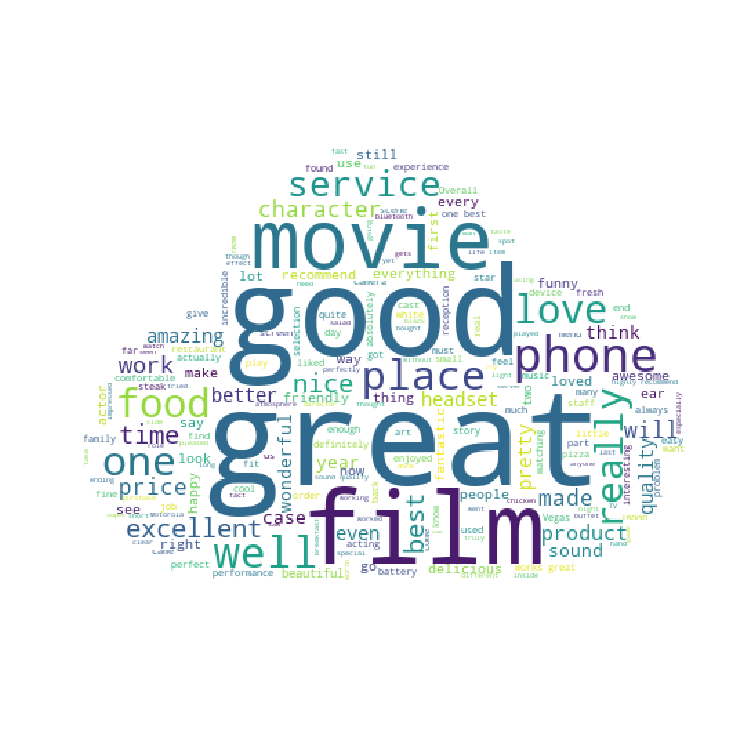

In [18]:
wordcloud_draw(data=pos_sentiment['text'], mask=mask_)

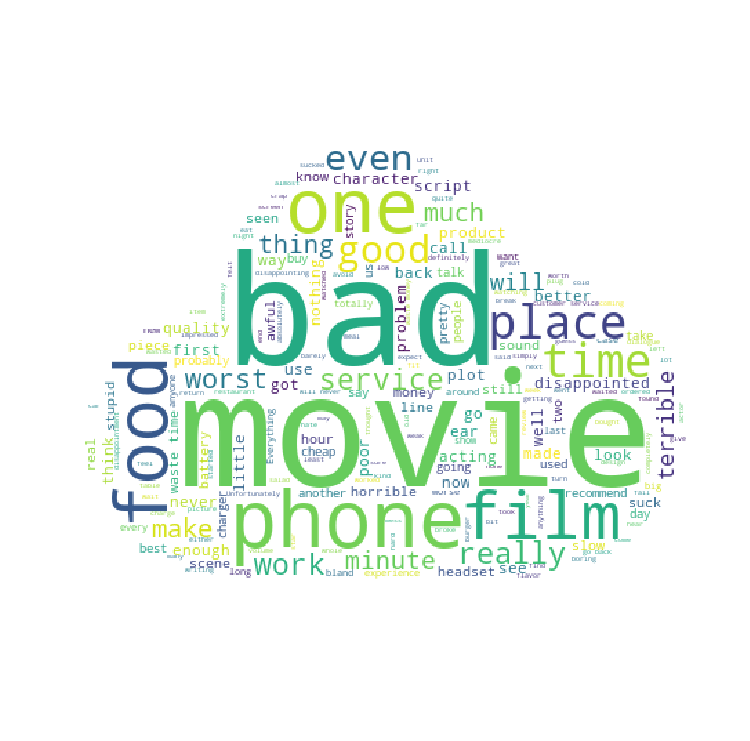

In [19]:
wordcloud_draw(neg_sentiment['text'], mask=mask_)

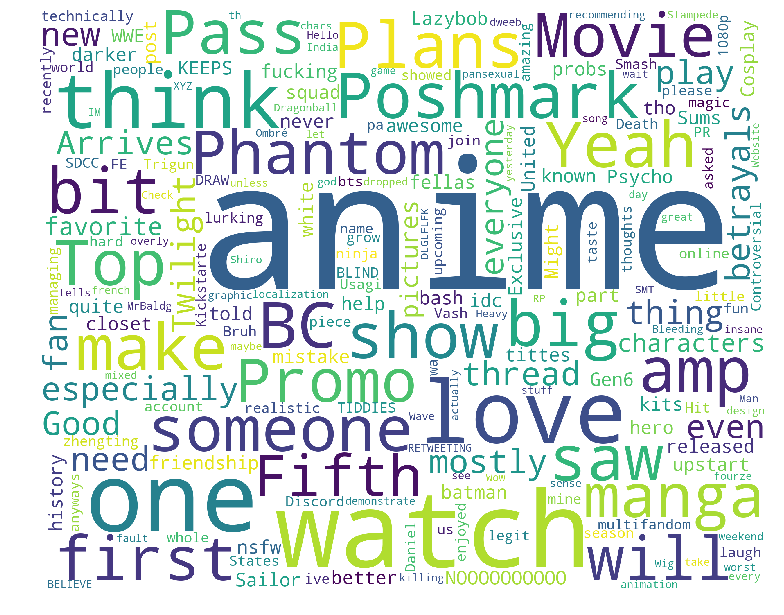

In [20]:
wordcloud_draw(tweet_df['text'])